In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.shape

(29020, 18)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(7661)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(21359, 18)

### Data Exploration

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df['no_of_adults'].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [14]:
df['no_of_children'].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [15]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

The data is imbalanced since number booking status

In [16]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [17]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'required_car_parking_space', 
            'market_segment_type', 'booking_status', 'repeated_guest']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
            'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
            'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
            'avg_price_per_room', 'no_of_special_requests']

In [19]:
print(f'Category columns : {len(cat_cols)}')
print(f'Numerical columns : {len(num_cols)}')

Category columns : 6
Numerical columns : 12


### Data Analysis

In [20]:
data = df.copy()

In [21]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


- Univariate analysis

In [22]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5)) # สร้างกราฟแบบตาราง
    if len(num_features) == 1:
        axes = [axes]
    
    for i, column in enumerate(num_features):
        # Histogram with color parameter instead of palette
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, color="steelblue")
        axes[i][0].set_title(f"Histogram for {column}")

        # Box plot with color parameter instead of palette
        sns.boxplot(data=df, x=column, ax=axes[i][1], color="lightblue")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

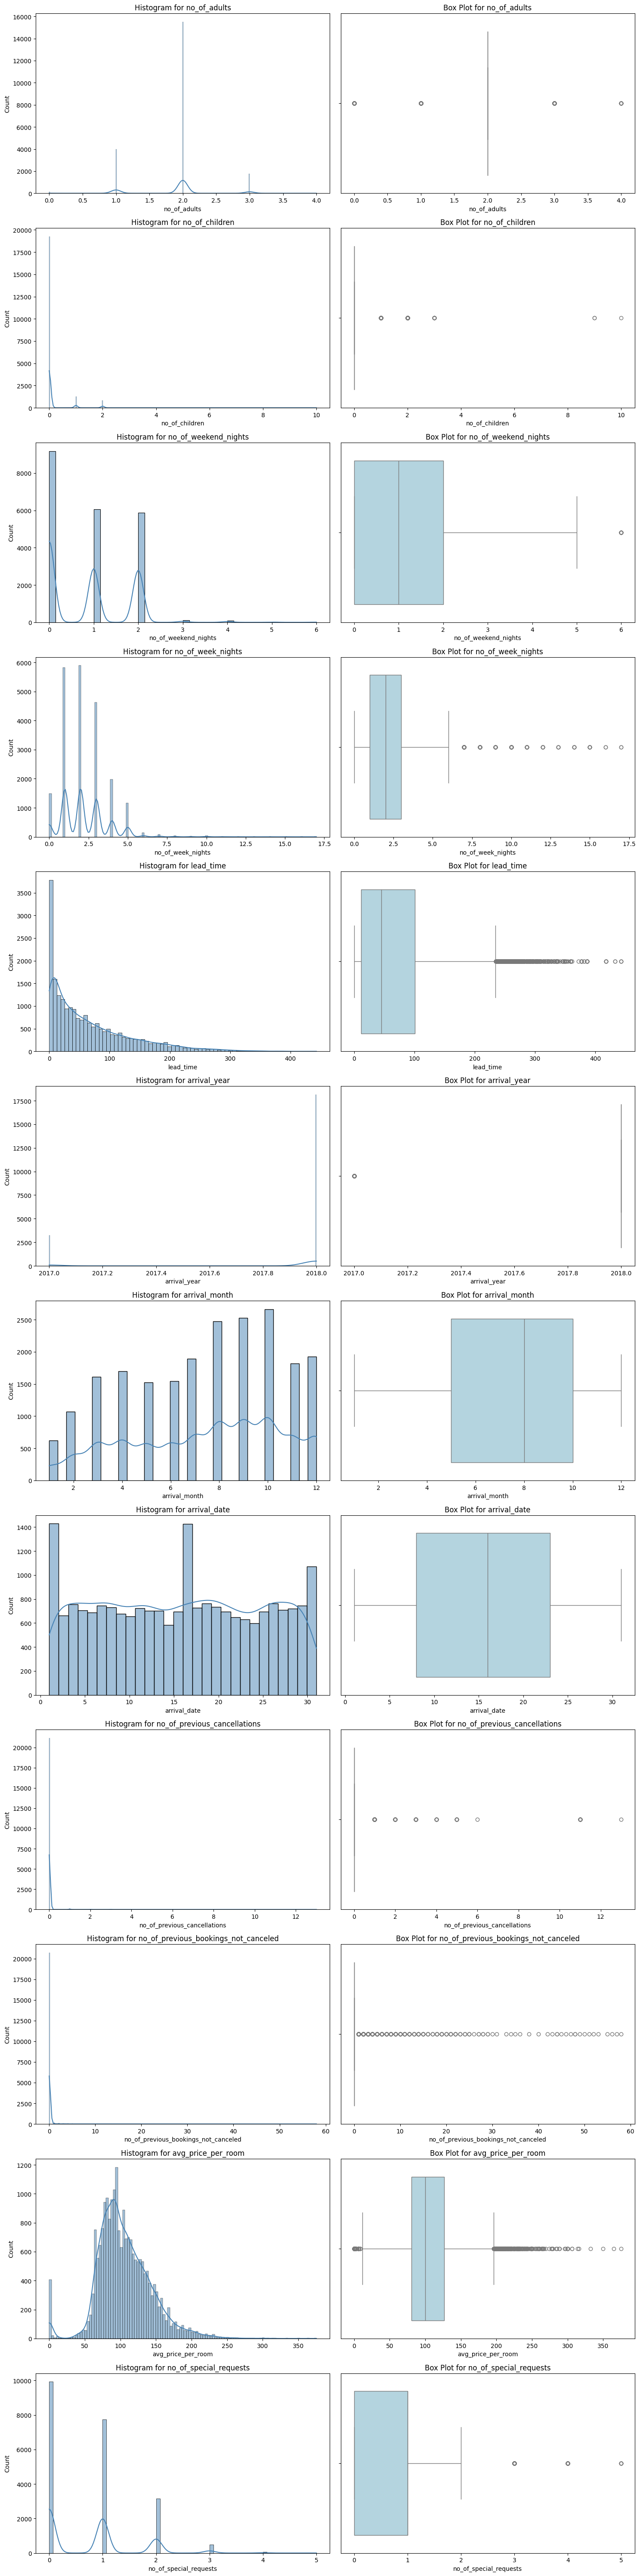

In [23]:
num_plot_dist(data, num_cols)

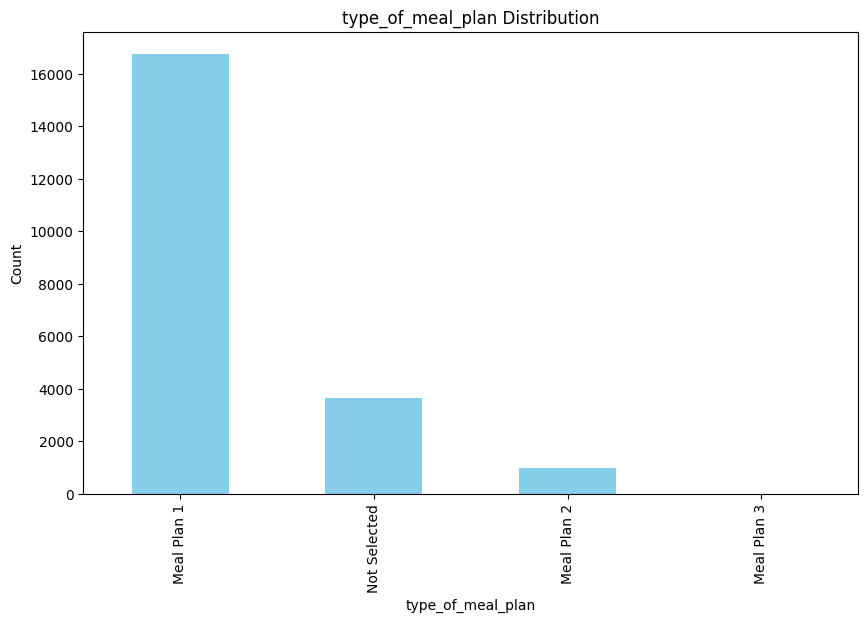

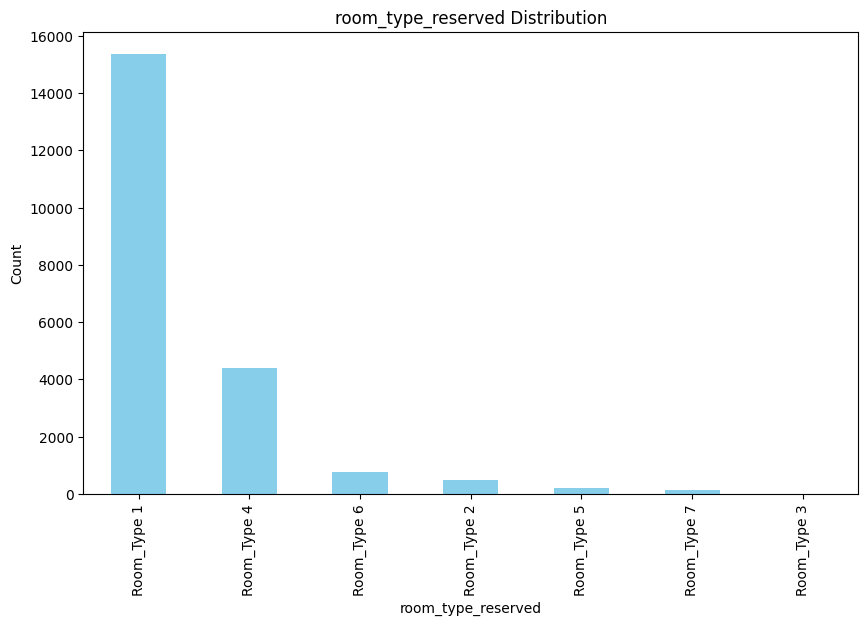

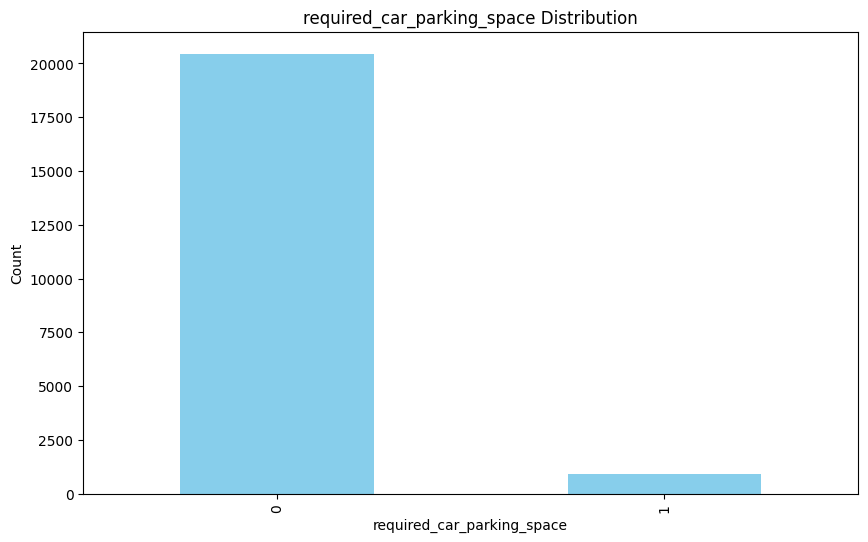

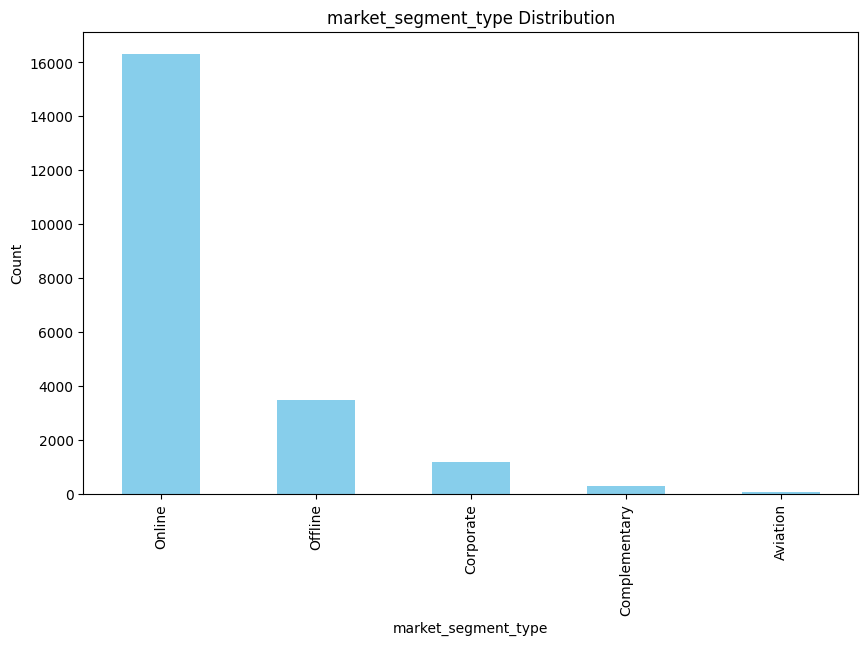

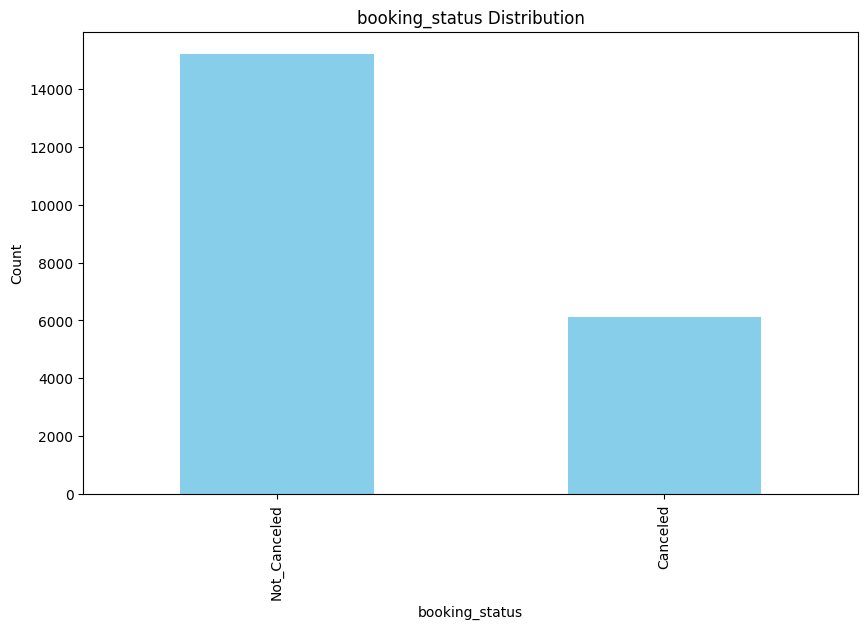

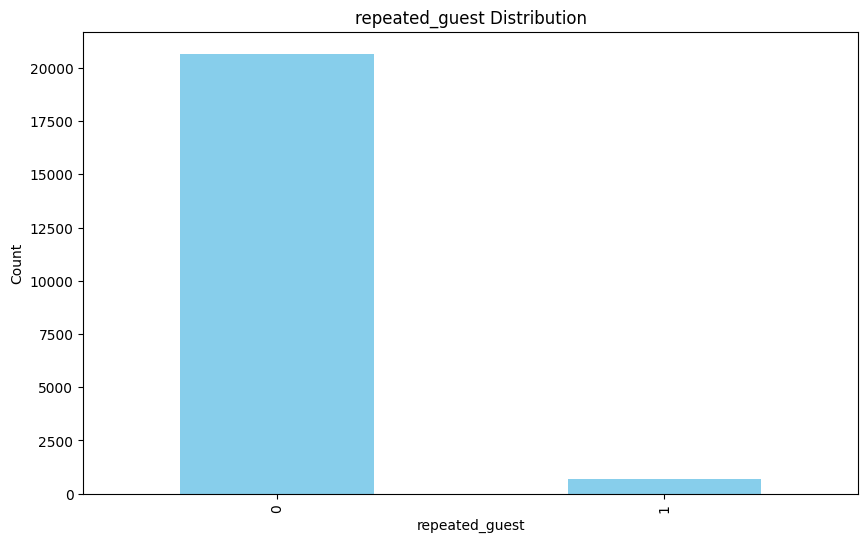

In [24]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{cat_feature} Distribution')
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

### Bivariate Analysis

In [25]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, color='steelblue')
        axes[i].set_title(f'{column} vs {target}')
    
    plt.tight_layout()
    plt.show()

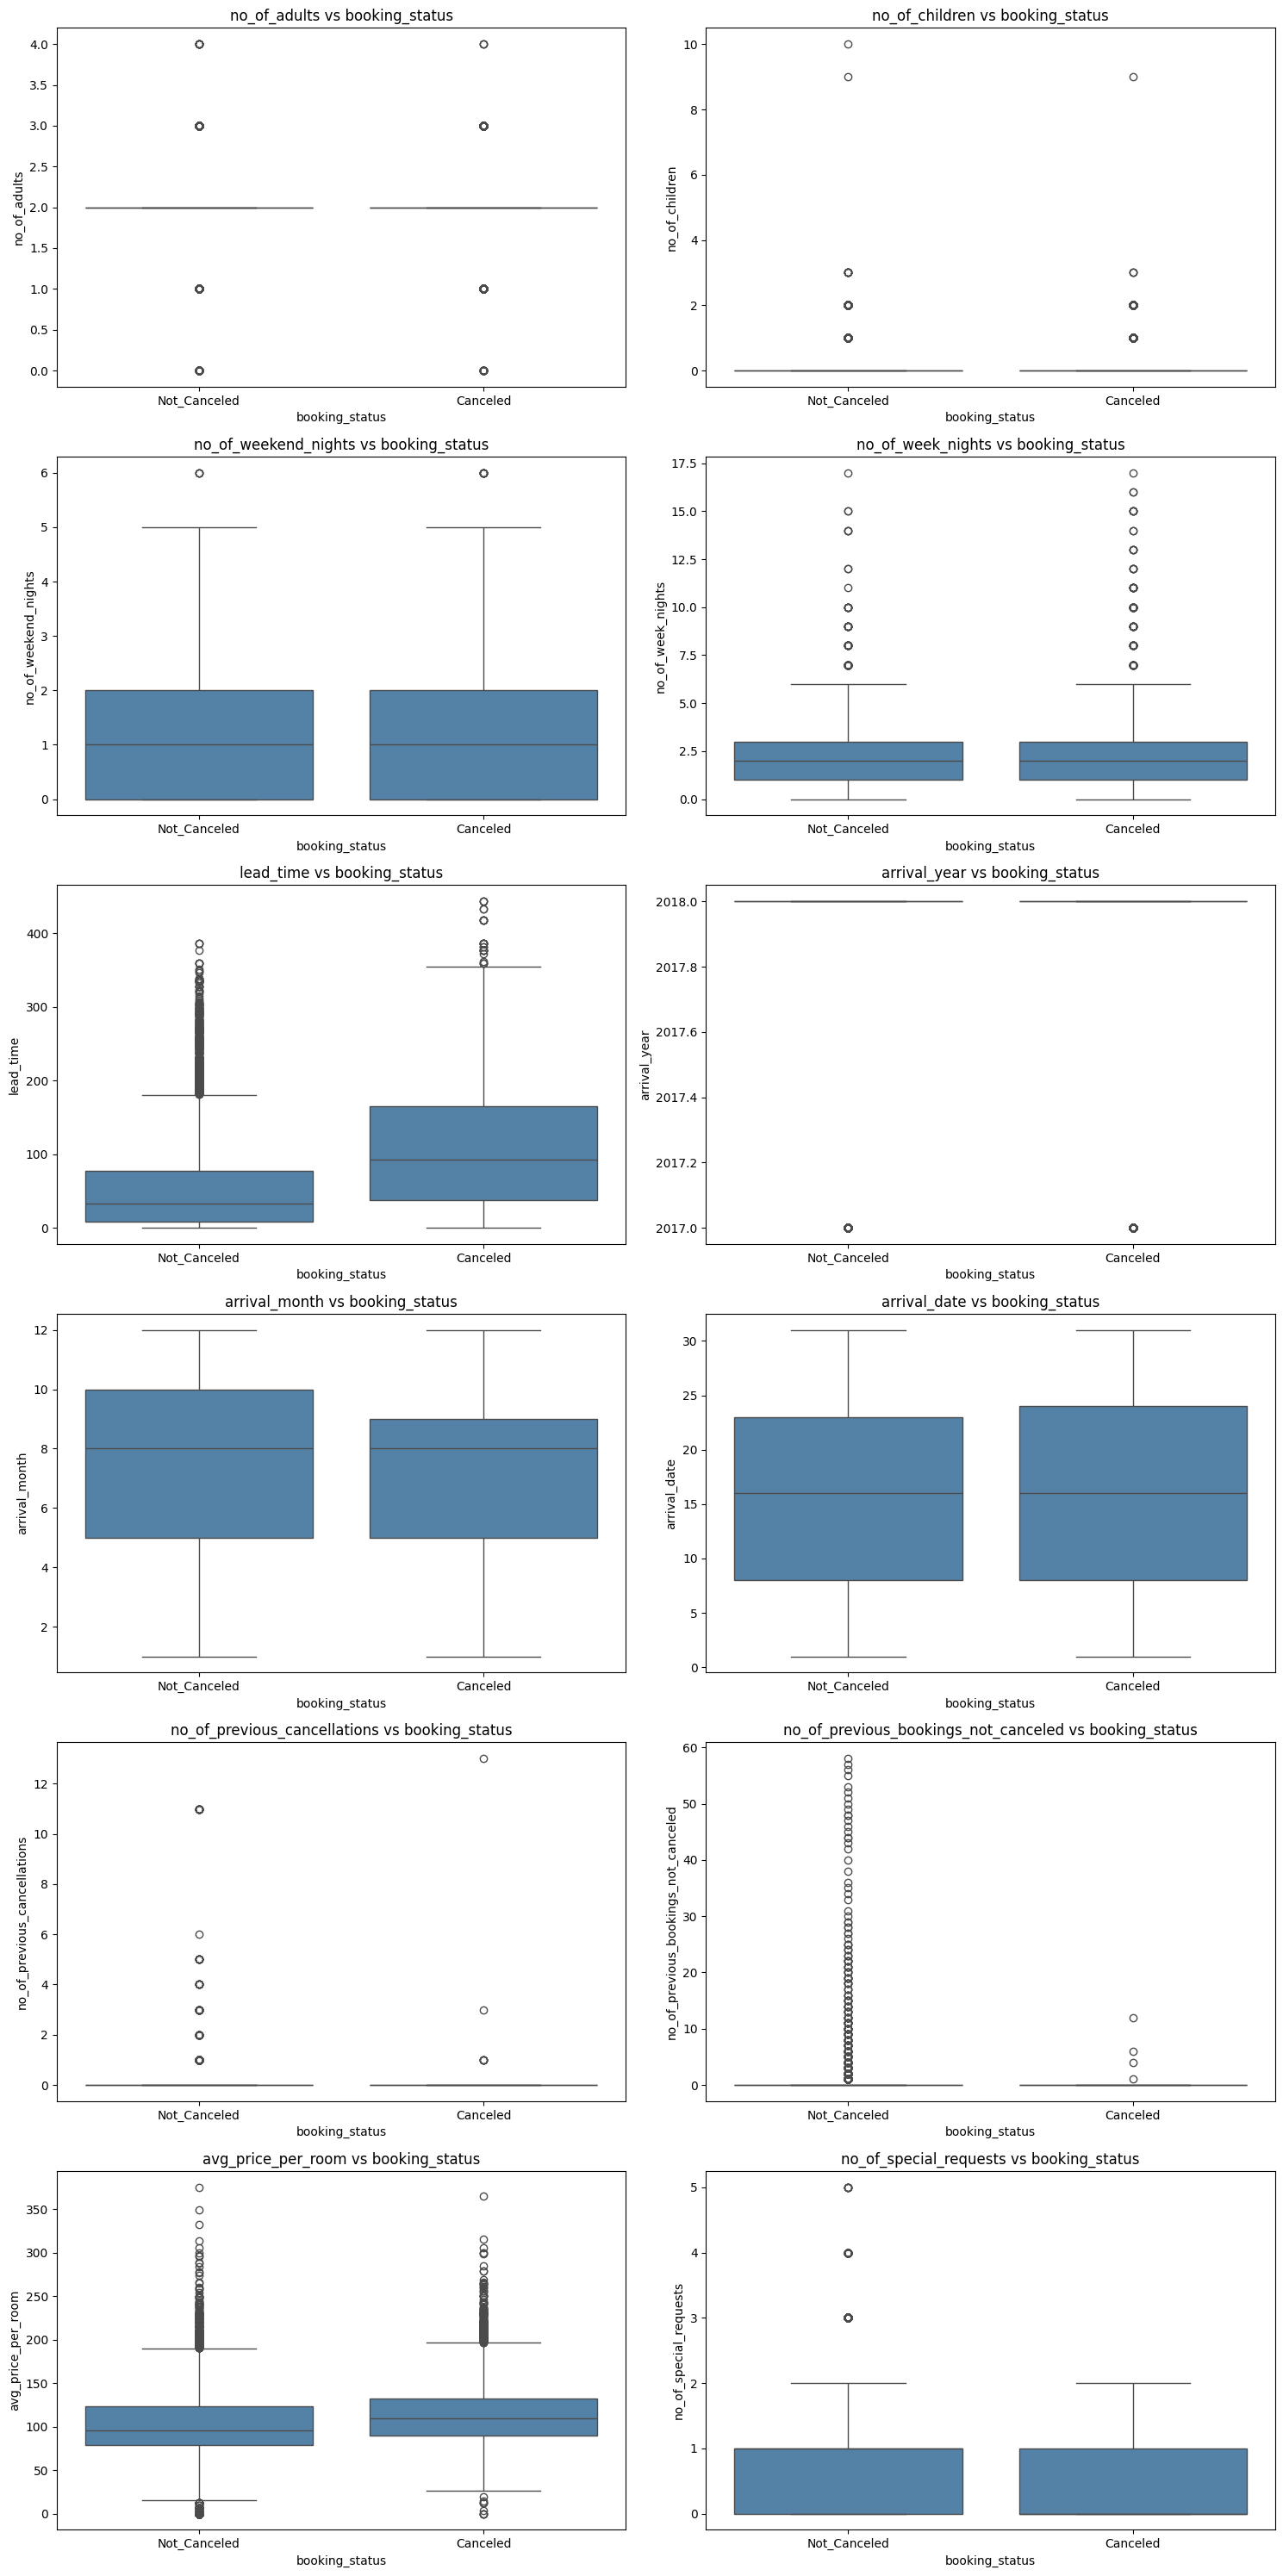

In [26]:
plot_bivariate_num(data, 'booking_status', num_cols)

- when lead_time increased, the cancel chance are more higher

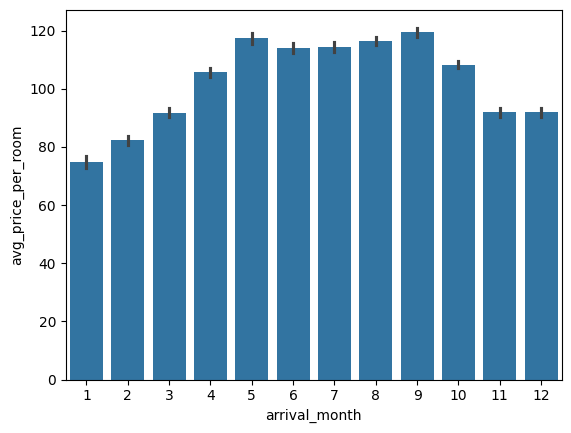

In [27]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [28]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

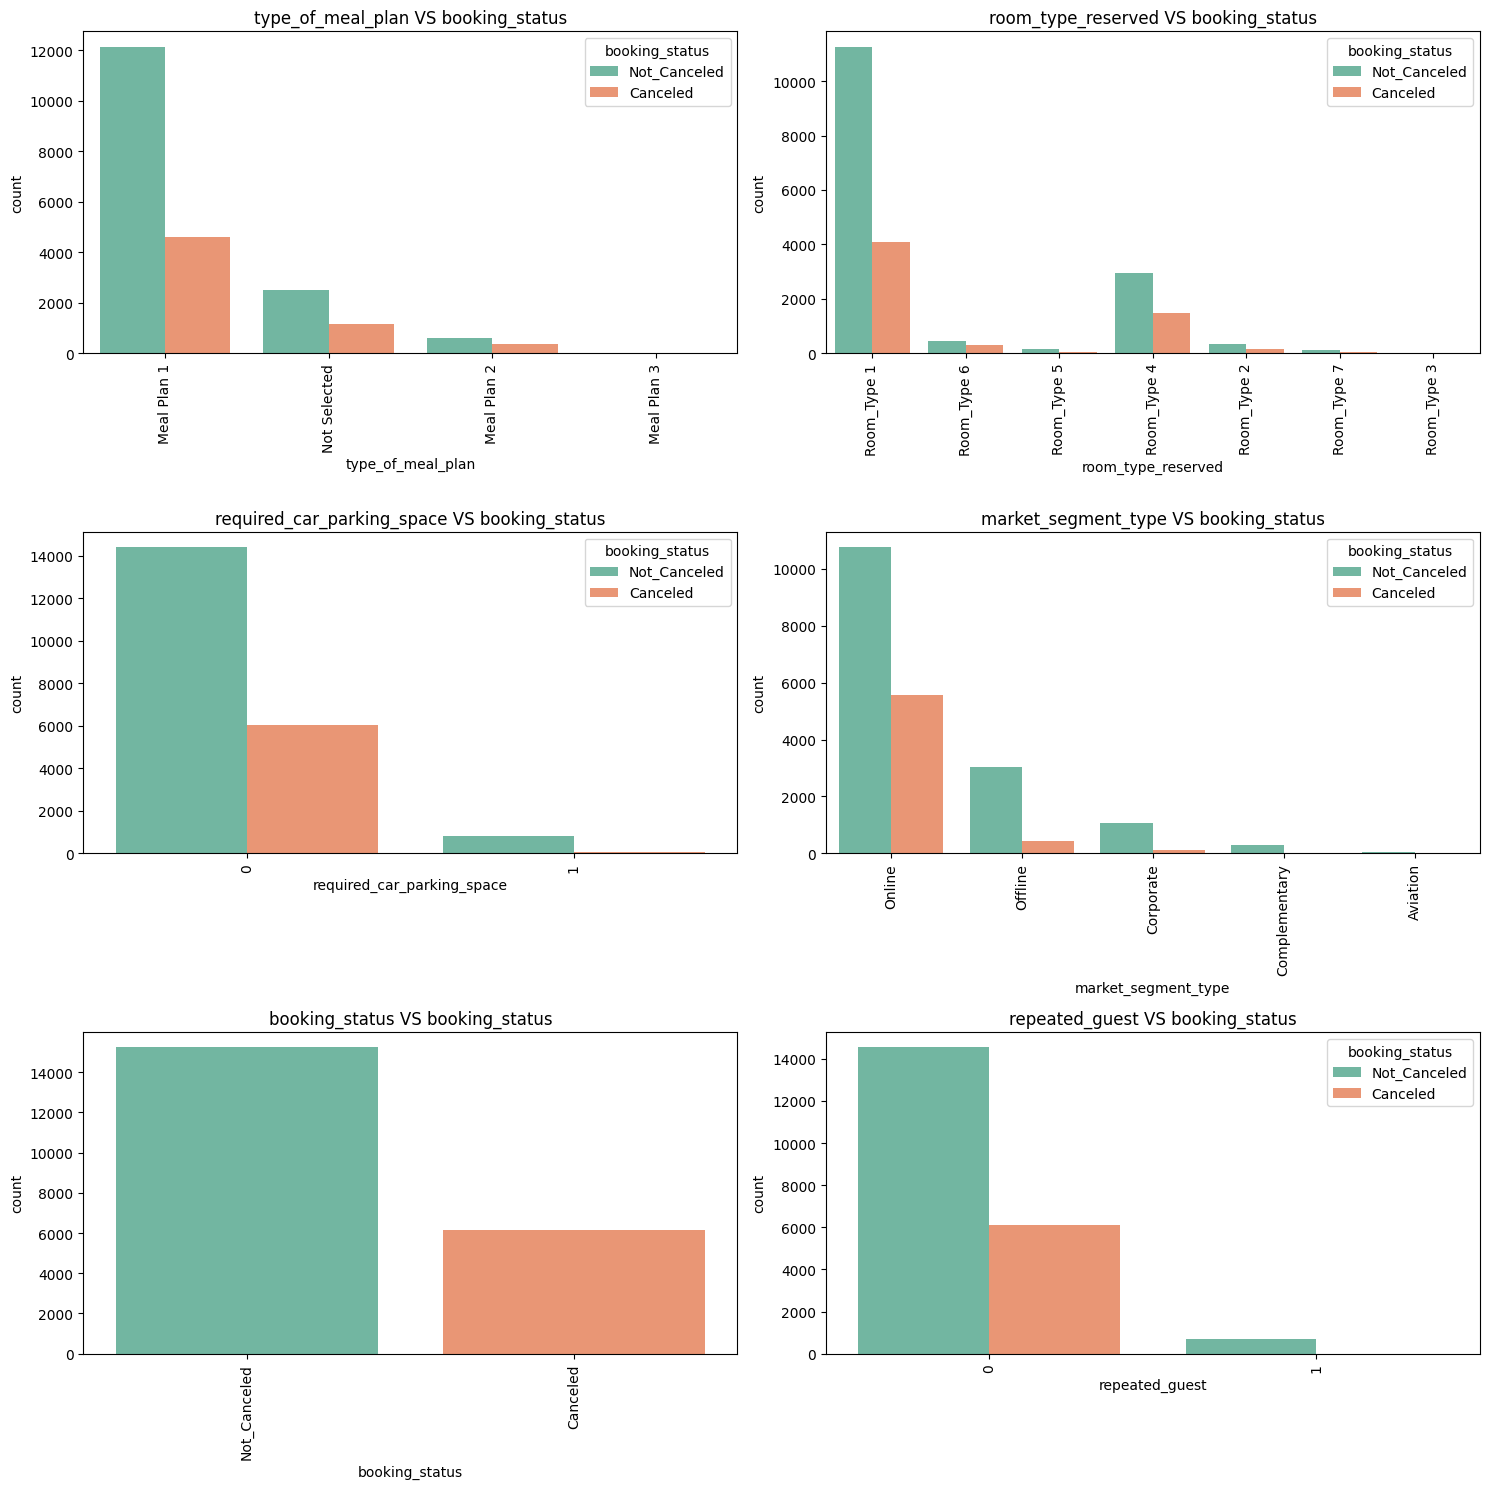

In [29]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

### Data Processing

In [30]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

- Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()
mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    # store in mappings
    mappings[col] = {label:code for label,code in zip(label_encoder.classes_, label_encoder.fit_transform(label_encoder.classes_))}

In [34]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}}

In [35]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

- Check Multicollinearity

In [37]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [39]:
X = add_constant(df)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [40]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


- since VIF is around 1, so there's no multicollinearity

In [41]:
corr = df.corr()

<Axes: >

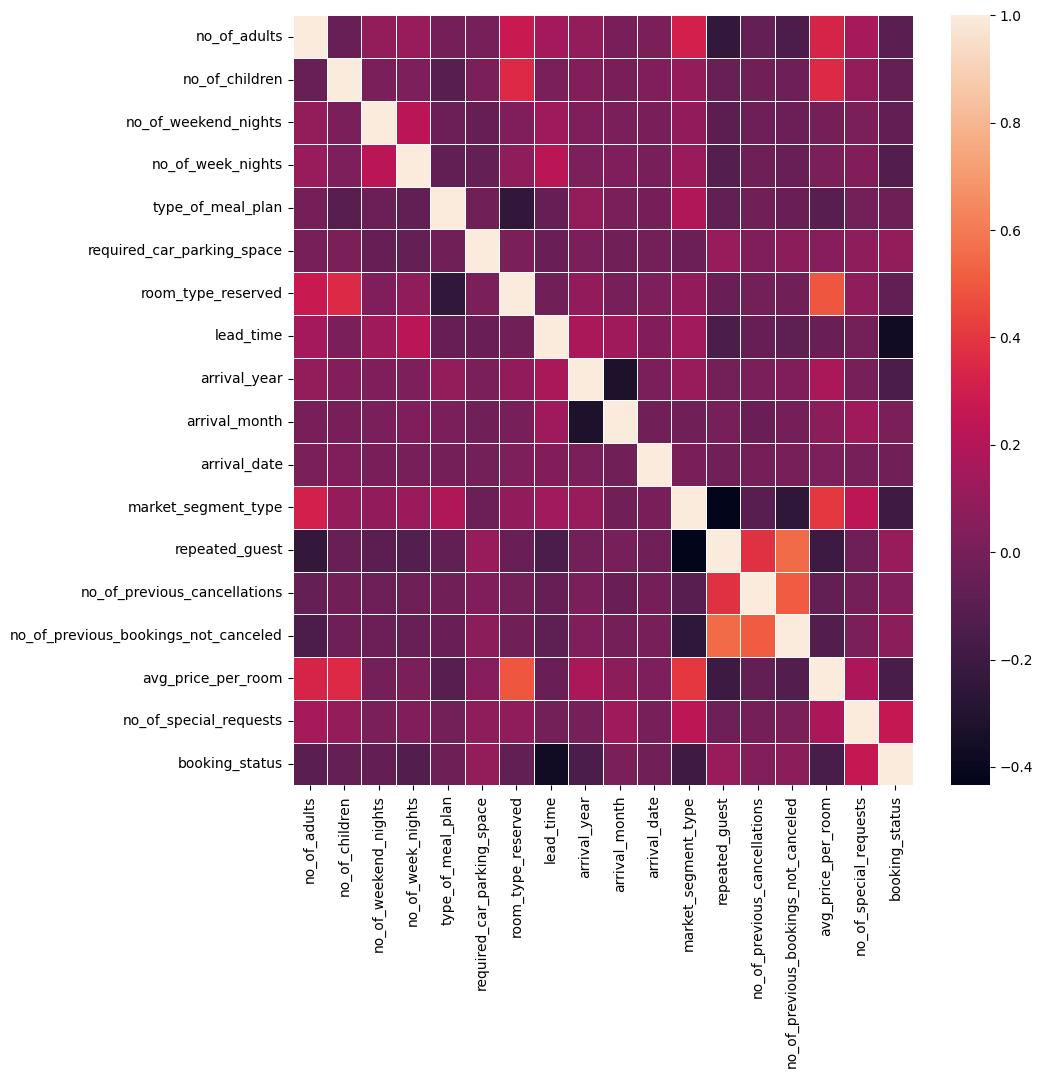

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.5)

- Check the skewness

In [43]:
skewness = df.skew()

In [44]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

- we will apply log transformation to address right skew
- skewness > 1 is generally considered highly skewed

In [45]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

### Handle imbalanced data

In [46]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [47]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [48]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [49]:
y

0        1
1        1
2        0
3        1
4        0
        ..
29012    0
29013    1
29014    1
29015    1
29019    1
Name: booking_status, Length: 21359, dtype: int64

- We will use SMOTE to address those few class

In [50]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [53]:
X_res

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,2,0,0,2,1,0,0,265,2018,6,24,3,0.0,0.0,0.0,111.037207,0
30458,1,0,1,3,0,0,0,103,2018,4,18,3,0.0,0.0,0.0,72.250000,0
30459,2,0,1,2,1,0,0,27,2018,6,12,4,0.0,0.0,0.0,104.556265,0
30460,1,0,1,1,3,0,0,46,2018,4,4,4,0.0,0.0,0.0,107.100000,0


In [54]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [55]:
df.shape

(21359, 18)

- Create new balanced df 

In [56]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res


In [57]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [58]:
balanced_df.shape

(30462, 18)

### Feature selection

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [61]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [62]:
feature_importance = model.feature_importances_

In [63]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

In [64]:
top_important_feature_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [65]:
top_important_feature_df

,feature,importance
7,lead_time,0.283888
15,avg_price_per_room,0.161256
16,no_of_special_requests,0.120572
10,arrival_date,0.097354
9,arrival_month,0.079493
11,market_segment_type,0.064261
3,no_of_week_nights,0.055839
2,no_of_weekend_nights,0.037834
8,arrival_year,0.021267
0,no_of_adults,0.020094


In [66]:
top_10_features = top_important_feature_df['feature'].head(10).values
top_10_features_df = df[top_10_features.tolist() + ['booking_status']]

In [67]:
df = top_10_features_df.copy()

In [68]:
df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.00,0,17,10,4,1,2,2017,2,1
1,98,121.50,2,16,7,4,1,1,2018,2,1
2,433,70.00,0,8,9,3,3,0,2018,2,0
3,195,72.25,0,8,8,3,5,2,2018,2,1
4,188,130.00,0,15,6,3,2,0,2018,1,0


### Model training and selection

- we will use xgboost and lightgbm

In [69]:
!pip install xgboost lightgbm


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [71]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Logistic Regression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier" : SVC(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [74]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [75]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

[LightGBM] [Info] Number of positive: 12230, number of negative: 4857
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 17087, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.715749 -> initscore=0.923471
[LightGBM] [Info] Start training from score 0.923471


In [76]:
metrics_df = pd.DataFrame(metrics)

In [77]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.850187,0.871343,0.923026,0.896440
1,Logistic Regression,0.790964,0.811282,0.915362,0.860185
2,Gradient Boosting,0.841526,0.861543,0.922692,0.891070
3,Support Vector Classifier,0.731039,0.730463,0.978007,0.836301
4,Decision Tree,0.795646,0.856330,0.852049,0.854184
5,KNN,0.741105,0.778267,0.883039,0.827349
6,Naive Bayes,0.770599,0.851234,0.816061,0.833277
7,XGboost,0.849251,0.874484,0.917028,0.895250
8,Adaboost,0.804307,0.822077,0.920693,0.868595
9,LGBM,0.856039,0.878250,0.923026,0.900081


- top 3 most effienct: **Random Forest**, **XGboost** and **LGBM**

### Tuning model's hyperparameter
- we will choose Random Forest

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [79]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [80]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [81]:
rf = RandomForestClassifier(random_state=42)

In [82]:
params_dist={
    'n_estimators' : randint(100,500), # amount of trees
    'max_depth' : randint(10,50), # tree depth
    'min_samples_split': randint(2,10), # minimum samples required in a node before it can be split further
    'min_samples_leaf' : randint(1,5), # minimum number of samples required in each leaf node.
    'bootstrap' : [True , False] # random sampling with replacement from training data
}

In [83]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [84]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   9.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  11.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  13.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.4s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013ABCB78A50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013ABCB1A3F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013ABCB78910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013ABCB16900>},
                   random_state=42, scoring='accuracy', verbose=2)

In [85]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [86]:
# get the highest accuracy from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

In [87]:
y_pred = best_rf_model.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {
    "Model" : "Best Random Forest Model",
    "Accuracy" : accuracy,
    "Precision" : precision,
    "Recall" : recall,
    "F1 Score" : f1
}

metrics_df = pd.DataFrame([metrics])

In [89]:
'''
if performance not satisfy, you can increase n_iter in random_search (since I just set 5 iteration only)
'''
metrics_df.head() 

,Model,Accuracy,Precision,Recall,F1 Score
0,Best Random Forest Model,0.852528,0.871049,0.927358,0.898321


### Save model

In [90]:
import joblib

In [91]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [92]:
loaded_model = joblib.load("random_forest.pkl")

In [93]:
X_train[:5]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults
16440,3,128.00,2,7,8,4,0,1,2018,2
15700,2,101.00,1,2,3,4,3,0,2018,2
9280,6,162.33,0,18,9,4,1,2,2018,2
25479,109,72.25,0,29,8,3,1,1,2018,2
7135,27,96.90,2,8,12,4,3,1,2018,2


In [97]:
new_data = np.array([3,	128.00, 2, 7, 8, 4, 0, 1, 2018, 2]).reshape(1, -1)

In [107]:
predictions = loaded_model.predict(new_data)

In [108]:
predictions

array([1])